In [19]:
import pandas as pd
import numpy as np


In [ ]:
file_path = 'data/fm_data/fm24/epl.rtf'

def rtf_file_to_csv(file_path,nlines=None):

    """
    Convert an RTF file to a CSV file by extracting lines of text.
    Parameters:
    file_path (str): The path to the RTF file.
    nlines (int): The number of lines to extract from the RTF file.
    """
    import pandas as pd

    counter = 0
    lines_list = []
    with open(file_path, encoding='utf-8', errors='ignore') as file:
        # Read all the RTF file's content

        text = file.read()
        for l in text.splitlines():
            split= l.split(' | ')
            split = [x.replace('|','').strip() for x in split]  # Remove empty strings

            # Skip every second line as it is part of the formatting of the RTF file and doesn't contain useful data
            if counter %2 == 0:
                lines_list.append(split)

            counter +=1
            if nlines:
                if counter > nlines:
                    break
    file.close()

    df = pd.DataFrame(lines_list)
    df.rename(columns = df.iloc[0], inplace=True)
    df = df[1:]  # Remove the first row which is now the header
    df.reset_index(drop=True, inplace=True)

    df.to_csv(file_path.replace('rtf','csv'), index=False)

rtf_file_to_csv(file_path)

In [147]:
fm = pd.read_csv('data/fm_data/fm24/epl.csv')
fm


,Name,Pick,Round,Drafted Club,Season 2027/28,Season 2026/27,Season 2025/26,Season 2024/25,Asking Price,Agreed Playing Time,...,Potential,Division,Best Pos,Yearly Wage Rise,Short-term Plans,Time Out,Goals,Best Role.3,Actual Playing Time,Unnamed: 207
0,Max Aarons - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,D (R),0%,NaN,-,-,Inverted Wing-Back,-,NaN
1,Adam Abbas - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,ST (C),0%,NaN,-,-,Poacher,-,NaN
2,George Abbott - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,M (C),0%,NaN,-,-,Central Midfielder,-,NaN
3,Zach Abbott - English,NaN,NaN,NaN,-,-,-,Breakthrough Prospect,-,Scouting Required,...,NaN,English Premier Division,D (C),0%,NaN,-,-,Central Defender,-,NaN
4,Dondre Abraham - English,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,GK,0%,NaN,-,-,Goalkeeper,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Erion Zabeli - Albanian,NaN,NaN,NaN,-,-,-,-,-,Scouting Required,...,NaN,English Premier Division,D (C),0%,NaN,-,-,No-Nonsense Centre-Back,-,NaN
1377,Nicolò Zaniolo - Italian,NaN,NaN,NaN,-,-,-,-,-,-,...,NaN,English Premier Division,AM (L),0%,NaN,-,2,Inside Forward,-,NaN
1378,Oleksandr Zinchenko - Ukrainian,NaN,NaN,NaN,-,-,-,-,-,Regular Starter,...,NaN,English Premier Division,D (L),0%,NaN,2 - 8 weeks,8,Complete Wing-Back,-,NaN
1379,Kurt Zouma - French,NaN,NaN,NaN,-,-,-,-,-,Regular Starter,...,NaN,English Premier Division,D (C),0%,NaN,-,1,Wide Centre-Back,-,NaN


In [22]:
fm['Wage After Tax Per Week GBP'] = fm['Wage After Tax']

In [25]:
def get_weekly_wage(wage_column):
    """
    Extract the weekly wage from a string.
    
    Parameters:
    wage_str (str): The wage string.
    
    Returns:
    float: The weekly wage as a float.
    """

    new_wage_column = wage_column.str.replace('£', '')
    new_wage_column = new_wage_column.str.replace(',', '')

    new_wage_column = new_wage_column.str.replace('p/w', '')
    new_wage_column = new_wage_column.str.strip()

    # Remove currency symbols and commas, then convert to float
    return new_wage_column.astype(float)

fm['Wage After Tax Weekly']= get_weekly_wage(fm['Wage After Tax'])
fm['Wage After Tax Weekly']

0       18750.0
1         220.0
2         525.0
3        1000.0
4         220.0
         ...   
1376     1000.0
1377    30500.0
1378    64000.0
1379    53000.0
1380        NaN
Name: Wage After Tax Weekly, Length: 1381, dtype: float64

<Axes: ylabel='Frequency'>

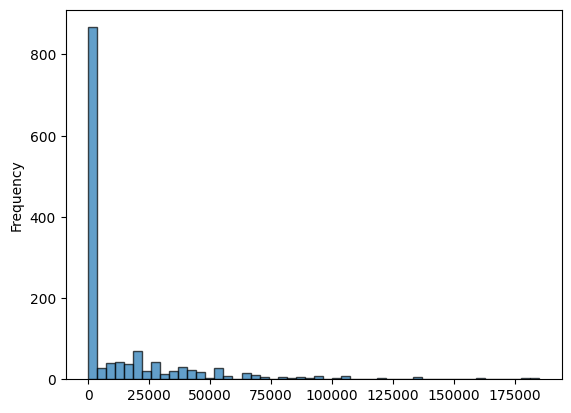

In [26]:
fm['Wage After Tax Weekly'].plot.hist(bins=50, edgecolor='black', alpha=0.7)

In [27]:
fm.sort_values(by='Wage After Tax Weekly', ascending=False, inplace=True)

In [28]:
fm[['AT Apps', 'AT Gls', 'Nat .1']] = np.nan

In [125]:
fm2023 = pd.read_csv('data/fm_data/fm2023.csv')
fm2023

,UID,Inf,Name,DoB,Nat,Division,Club,Based,Preferred Foot,Right Foot,...,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor
0,831079,,Giorgio Chiellini,14/8/1984 (37 years old),ITA,Major League Soccer,LAFC,U.S.A. (MLS),Left Only,Weak,...,1,2,10,14,18,17,8,4,7,15
1,2105510,,Hulk,25/7/1986 (35 years old),BRA,Brazilian National First Division,ATM,Brazil (First Division),Left,Reasonable,...,2,1,15,18,8,8,15,3,14,11
2,78000335,,Luis Suárez,24/1/1987 (35 years old),URU,Uruguayan First Division,Nacional,Uruguay (First Division),Right,Very Strong,...,1,3,10,14,9,13,15,3,15,9
3,962988,Ret,Gonzalo Higuaín,10/12/1987 (34 years old),ARG,Major League Soccer,Inter Miami,U.S.A. (MLS),Right,Very Strong,...,1,3,10,16,8,10,16,1,14,10
4,19007730,,Alex Teixeira,6/1/1990 (32 years old),BRA,Brazilian National Second Division,VDG,Brazil (Second Division),Right,Very Strong,...,1,3,11,7,5,10,16,2,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189340,2000216213,Loa,Afonso Couto,7/2/2003 (19 years old),POR,Portugal Championship - Group B ...,Salgueiros,Portugal (PT Championship B),Right Only,Very Strong,...,1,1,7,4,4,5,8,2,12,9
189341,2000200779,,Chen-Guan Jian,4/2/2004 (18 years old),CHN,Portugal Championship - Group D ...,Oriental Dragon,Portugal (PT Championship D),Right Only,Very Strong,...,3,1,6,4,11,2,1,3,1,3
189342,83218137,FrA,Fretson Cruz,10/12/1995 (26 years old),POR,- ...,,Portugal,Right Only,Very Strong,...,1,2,13,7,3,5,7,2,5,8
189343,83160131,Wnt,Luís Tissi,1/6/1997 (25 years old),BRA,- ...,,Spain,Left Only,Very Weak,...,1,4,8,6,11,5,3,2,5,6


In [159]:
fm23_cols = fm2023.columns
fm23_cols = [x.strip() for x in fm23_cols]
fm2023.columns = fm23_cols
fm2023['date_of_birth'] = (pd.to_datetime(fm2023['DoB'].str.strip().str.split(' ').str[0]).dt.date).astype(str)
# fm2023['Name'].str.strip().str.split(' ')


country_names = {
    'ARG': 'Argentina',
    'BRA': 'Brazil',
    'ITA': 'Italy',
    'ESP': 'Spain',
    'ENG': 'England',
    'FRA': 'France',
    'GER': 'Germany',
    'BEL': 'Belgium',
    'ROU': 'Romania',
    'POR': 'Portugal',
    'USA': 'United States',
    'SWE': 'Sweden',
    'NOR': 'Norway',
    'HUN': 'Hungary',
    'GRE': 'Greece',
    'SUI': 'Switzerland',
    'COL': 'Colombia',
    'TUR': 'Turkey',
    'URU': 'Uruguay',
    'AUT': 'Austria',
    'MEX': 'Mexico',
    'SCO': 'Scotland',
    'CHI': 'Chile',
    'DEN': 'Denmark',
    'POL': 'Poland',
    'CHN': 'China',
    'RSA': 'South Africa',
    'CZE': 'Czech Republic',
    'NED': 'Netherlands',
    'PER': 'Peru',
    'ISR': 'Israel',
    'SRB': 'Serbia',
    'RUS': 'Russia',
    'BLR': 'Belarus',
    'MAS': 'Malaysia',
    'BUL': 'Bulgaria',
    'NIR': 'Northern Ireland',
    'UKR': 'Ukraine',
    'ISL': 'Iceland',
    'CRO': 'Croatia',
    'IRL': 'Republic of Ireland',
    'WAL': 'Wales',
    'SVN': 'Slovenia',
    'CAN': 'Canada',
    'IDN': 'Indonesia',
    'KOR': 'South Korea',
    'SVK': 'Slovakia',
    'NZL': 'New Zealand',
    'FIN': 'Finland',
    'AUS': 'Australia',
    'NGA': 'Nigeria',
    'GHA': 'Ghana',
    'LVA': 'Latvia',
    'BRU': 'Brunei',
    'IND': 'India',
    'CIV': "Ivory Coast (Côte d'Ivoire)",
    'SEN': 'Senegal',
    'BIH': 'Bosnia and Herzegovina',
    'MAR': 'Morocco',
    'ALB': 'Albania',
    'CMR': 'Cameroon',
    'SIN': 'Singapore',
    'VEN': 'Venezuela',
    'FIJ': 'Fiji',
    'KOS': 'Kosovo',
    'SOL': 'Solomon Islands',
    'HKG': 'Hong Kong',
    'VAN': 'Vanuatu',
    'NCL': 'New Caledonia',
    'COD': 'DR Congo',
    'PAR': 'Paraguay',
    'GNB': 'Guinea-Bissau',
    'MLI': 'Mali',
    'ALG': 'Algeria',
    'IRN': 'Iran',
    'SAM': 'Samoa',
    'GUI': 'Guinea',
    'JPN': 'Japan',
    'ECU': 'Ecuador',
    'TUN': 'Tunisia',
    'MKD': 'North Macedonia',
    'PNG': 'Papua New Guinea',
    'CPV': 'Cape Verde',
    'UZB': 'Uzbekistan',
    'SYR': 'Syria',
    'EGY': 'Egypt',
    'MNE': 'Montenegro',
    'KSA': 'Saudi Arabia',
    'ANG': 'Angola',
    'GAM': 'Gambia',
    'TAH': 'Tahiti',
    'BER': 'Bermuda',
    'JAM': 'Jamaica',
    'LIE': 'Liechtenstein',
    'BFA': 'Burkina Faso',
    'IRQ': 'Iraq',
    'GEO': 'Georgia',
    'BOL': 'Bolivia',
    'CRC': 'Costa Rica',
    'MDA': 'Moldova',
    'CGO': 'Congo',
    'LUX': 'Luxembourg',
    'COK': 'Cook Islands',
    'HAI': 'Haiti',
    'TOG': 'Togo',
    'ZIM': 'Zimbabwe',
    'PRK': 'North Korea',
    'TRI': 'Trinidad and Tobago',
    'THA': 'Thailand',
    'LTU': 'Lithuania',
    'GAB': 'Gabon',
    'CUW': 'Curaçao',
    'SLE': 'Sierra Leone',
    'ZAM': 'Zambia',
    'COM': 'Comoros',
    'AFG': 'Afghanistan',
    'QAT': 'Qatar',
    'CYP': 'Cyprus',
    'UGA': 'Uganda',
    'ARM': 'Armenia',
    'UAE': 'United Arab Emirates',
    'BEN': 'Benin',
    'PAN': 'Panama',
    'ASA': 'American Samoa',
    'LBR': 'Liberia',
    'JOR': 'Jordan',
    'AND': 'Andorra',
    'PLE': 'Palestine',
    'EQG': 'Equatorial Guinea',
    'BHR': 'Bahrain',
    'DOM': 'Dominican Republic',
    'MOZ': 'Mozambique',
    'SLV': 'El Salvador',
    'KEN': 'Kenya',
    'SUR': 'Suriname',
    'MTQ': 'Martinique',
    'GLP': 'Guadeloupe',
    'LIB': 'Lebanon',
    'AZE': 'Azerbaijan',
    'MLT': 'Malta',
    'HON': 'Honduras',
    'CTA': 'Central African Republic',
    'CUB': 'Cuba',
    'MTN': 'Mauritania',
    'TGA': 'Tonga',
    'PHI': 'Philippines',
    'TAN': 'Tanzania',
    'OMA': 'Oman',
    'GUY': 'Guyana',
    'MAD': 'Madagascar',
    'EST': 'Estonia',
    'FRO': 'Faroe Islands',
    'KUW': 'Kuwait',
    'TUV': 'Tuvalu',
    'BDI': 'Burundi',
    'SOM': 'Somalia',
    'KAZ': 'Kazakhstan',
    'LBY': 'Libya',
    'NIG': 'Niger',
    'PUR': 'Puerto Rico',
    'GIB': 'Gibraltar',
    'GUF': 'French Guiana',
    'NAM': 'Namibia',
    'STP': 'São Tomé and Príncipe',
    'TJK': 'Tajikistan',
    'GRN': 'Grenada',
    'ETH': 'Ethiopia',
    'ATG': 'Antigua and Barbuda',
    'RWA': 'Rwanda',
    'ERI': 'Eritrea',
    'VIE': 'Vietnam',
    'SKN': 'Saint Kitts and Nevis',
    'TKM': 'Turkmenistan',
    'FSM': 'Micronesia',
    'SUD': 'Sudan',
    'MSR': 'Montserrat',
    'KGZ': 'Kyrgyzstan',
    'GUA': 'Guatemala',
    'YEM': 'Yemen',
    'SMR': 'San Marino',
    'MWI': 'Malawi',
    'TLS': 'Timor-Leste',
    'TPE': 'Chinese Taipei',
    'SSD': 'South Sudan',
    'NEP': 'Nepal',
    'ARU': 'Aruba',
    'CHA': 'Chad',
    'SRI': 'Sri Lanka',
    'SMN': 'Saint Martin',
    'LES': 'Lesotho',
    'BRB': 'Barbados',
    'BAH': 'Bahamas',
    'LCA': 'Saint Lucia',
    'VIN': 'Saint Vincent and the Grenadines',
    'GUM': 'Guam',
    'VGB': 'British Virgin Islands',
    'BLZ': 'Belize',
    'NCA': 'Nicaragua',
    'MRI': 'Mauritius',
    'MAC': 'Macau',
    'PAK': 'Pakistan',
    'MYA': 'Myanmar',
    'CAY': 'Cayman Islands',
    'BOT': 'Botswana',
    'SMA': 'Sint Maarten',
    'VIR': 'U.S. Virgin Islands',
    'REU': 'Réunion',
    'DMA': 'Dominica',
    'TCA': 'Turks and Caicos Islands',
    'BAN': 'Bangladesh',
    'AIA': 'Anguilla',
    'SEY': 'Seychelles',
    'NMI': 'Northern Mariana Islands',
    'MAY': 'Mayotte',
    'DJI': 'Djibouti',
    'MGL': 'Mongolia',
    'SWZ': 'Eswatini (Swaziland)',
    'LAO': 'Laos',
    'BOE': 'Bonaire',
    'CAM': 'Cambodia',
    'MDV': 'Maldives',
    'MON': 'Monaco'
}
fm2023['nationality'] = fm2023['Nat'].str.strip().replace(country_names)
fm2023['date_of_birth_nationality']= fm2023['date_of_birth'] + fm2023['nationality']

/var/folders/1g/73xq_y097vb49f6ck4py9d6c0000gp/T/ipykernel_38273/673287392.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fm2023['date_of_birth'] = (pd.to_datetime(fm2023['DoB'].str.strip().str.split(' ').str[0]).dt.date).astype(str)


In [160]:
fl_players = pd.read_csv('data/football_lineups/player_dataset/players_dataset.csv')
fl_players['date_of_birth'] = (pd.to_datetime(fl_players['date_of_birth']).dt.date).astype(str)

fl_players['date_of_birth_short_name']=fl_players['date_of_birth']+fl_players['short_name']
fl_players['date_of_birth_nationality']= fl_players['date_of_birth'] + fl_players['nationality']

/var/folders/1g/73xq_y097vb49f6ck4py9d6c0000gp/T/ipykernel_38273/2641516024.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fl_players['date_of_birth'] = (pd.to_datetime(fl_players['date_of_birth']).dt.date).astype(str)


In [161]:
merged = pd.merge(fl_players, fm2023, left_on='date_of_birth_nationality', right_on='date_of_birth_nationality', how='inner', suffixes=('_fl', '_fm2023'))

In [162]:
merged

,short_name,full_name,date_of_birth_fl,height,nationality_fl,play_style,id,date_of_birth_short_name,date_of_birth_nationality,UID,...,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor,date_of_birth_fm2023,nationality_fm2023
0,Bueno,Santiago Ignacio Bueno Sciutto,1998-11-09,1.89 m,Uruguay,NaN,115142,1998-11-09Bueno,1998-11-09Uruguay,78070112,...,5,6,3,8,4,10,8,8,1998-11-09,Uruguay
1,Bueno,Santiago Ignacio Bueno Sciutto,1998-11-09,1.89 m,Uruguay,NaN,115142,1998-11-09Bueno,1998-11-09Uruguay,78076996,...,14,13,14,14,10,1,9,13,1998-11-09,Uruguay
2,Schmeichel,Kasper Schmeichel,1986-11-05,1.82 m,Denmark,NaN,6670,1986-11-05Schmeichel,1986-11-05Denmark,5114022,...,12,10,1,15,10,16,13,15,1986-11-05,Denmark
3,O'Riley,Matthew Sean ORiley,2000-11-21,1.87 m,Denmark,box to box midfielder,120719,2000-11-21O'Riley,2000-11-21Denmark,29186052,...,13,12,10,13,15,4,13,14,2000-11-21,Denmark
4,Isak,Alexander Isak,1999-09-21,1.90 m,Sweden,NaN,108635,1999-09-21Isak,1999-09-21Sweden,93070286,...,14,12,6,12,16,1,15,12,1999-09-21,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,Andrés García,Andres Garcia Robledo,2003-02-07,1.85 m,Spain,NaN,201340,2003-02-07Andrés García,2003-02-07Spain,2000143012,...,10,6,16,11,12,3,12,11,2003-02-07,Spain
1770,Andrés García,Andres Garcia Robledo,2003-02-07,1.85 m,Spain,NaN,201340,2003-02-07Andrés García,2003-02-07Spain,2000217847,...,10,6,8,8,9,1,14,9,2003-02-07,Spain
1771,Andrés García,Andres Garcia Robledo,2003-02-07,1.85 m,Spain,NaN,201340,2003-02-07Andrés García,2003-02-07Spain,2000076420,...,4,5,1,7,4,8,6,6,2003-02-07,Spain
1772,Andrés García,Andres Garcia Robledo,2003-02-07,1.85 m,Spain,NaN,201340,2003-02-07Andrés García,2003-02-07Spain,2000212943,...,13,5,6,8,12,1,9,9,2003-02-07,Spain


In [167]:
merged[['full_name','Name','date_of_birth_nationality','height','Height']]

,full_name,Name,date_of_birth_nationality,height,Height
0,Santiago Ignacio Bueno Sciutto,Francisco Tinaglini,1998-11-09Uruguay,1.89 m,188 cm
1,Santiago Ignacio Bueno Sciutto,Santiago Bueno,1998-11-09Uruguay,1.89 m,186 cm
2,Kasper Schmeichel,Kasper Schmeichel,1986-11-05Denmark,1.82 m,189 cm
3,Matthew Sean ORiley,Matt O'Riley,2000-11-21Denmark,1.87 m,187 cm
4,Alexander Isak,Alexander Isak,1999-09-21Sweden,1.90 m,190 cm
...,...,...,...,...,...
1769,Andres Garcia Robledo,David Navarro,2003-02-07Spain,1.85 m,179 cm
1770,Andres Garcia Robledo,Pablo Guerrero,2003-02-07Spain,1.85 m,186 cm
1771,Andres Garcia Robledo,Álvaro Jiménez,2003-02-07Spain,1.85 m,186 cm
1772,Andres Garcia Robledo,Lluc Carrera,2003-02-07Spain,1.85 m,186 cm


In [164]:
merged['full_name'].nunique()

957